In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('conv.csv')
df['Date'] = pd.to_datetime(df["Date"])
df_idx = df.set_index(["Date"], drop=True)
df_idx.head(5)

Price    Open    High     Low  Change %
Date                                                
2017-08-10  64.165  63.898  64.175  63.855      0.48
2017-08-09  63.860  63.780  63.860  63.710      0.26
2017-08-08  63.692  63.750  63.785  63.615     -0.23
2017-08-07  63.840  63.710  63.865  63.648      0.26
2017-08-04  63.675  63.670  63.786  63.572     -0.05

In [4]:
df_idx = df_idx.sort_index(axis=1, ascending=True)
df_idx = df_idx.iloc[::-1]
df_idx.head(5)

Change %    High     Low    Open   Price
Date                                                
2017-08-10      0.48  64.175  63.855  63.898  64.165
2017-08-09      0.26  63.860  63.710  63.780  63.860
2017-08-08     -0.23  63.785  63.615  63.750  63.692
2017-08-07      0.26  63.865  63.648  63.710  63.840
2017-08-04     -0.05  63.786  63.572  63.670  63.675

<AxesSubplot:xlabel='Date'>

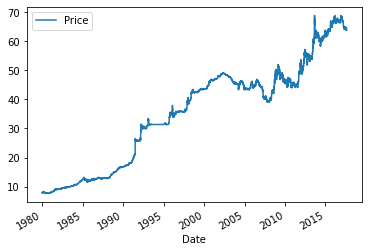

In [5]:
data = df_idx[['Price']]
data.plot(y='Price')

In [6]:
diff = data.index.values[-1] - data.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("Total data: %d years"%years)
print("80 percent data = 1980 to %d"%(1980 + int(0.8*years)))

Total data: -37 years
80 percent data = 1980 to 1951


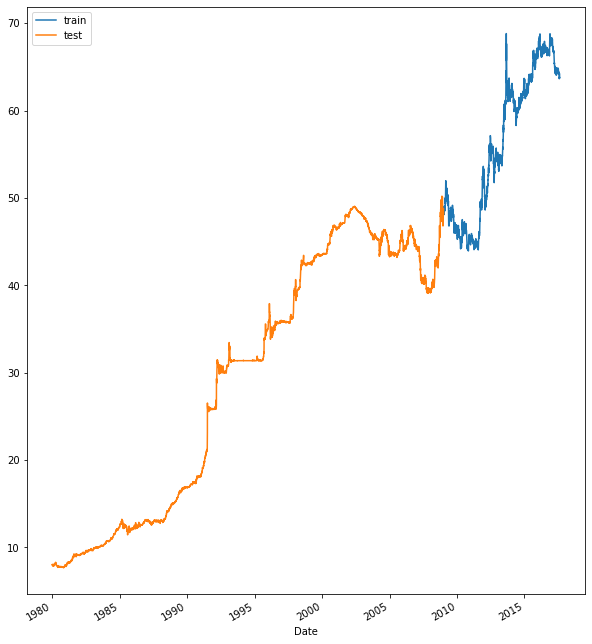

In [19]:
split_date = pd.Timestamp('01-01-2009')

train = data.loc[:split_date]
test = data.loc[split_date:]

ax = train.plot(figsize=(10,12))
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [20]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)
    
X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

In [15]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (2245 x 1)
Test size: (7451 x 1)
